## Imports

In [1]:
## Basic libraries
import numpy as np
import pandas as pd

## Graphs and visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

2024-08-25 17:49:13.061282: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 17:49:13.098138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-25 17:49:13.290096: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-25 17:49:13.291991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 17:49:14.254309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Data import

In [4]:
## Create pandas dataframe from data
Titanic_DF = pd.read_csv("titanic.csv")

In [5]:
## Display data
Titanic_DF.head()

,survived,sex,age,Siblings_Spouses,Parents_children,pclass
0,yes,female,29.0000,0,0,first
1,yes,male,0.9167,1,2,first
2,no,female,2.0000,1,2,first
3,no,male,30.0000,1,2,first
4,no,female,25.0000,1,2,first


## Feature engineering

In [6]:
## Convert survived to 0 == no, yes == 1
Titanic_DF["survived"] = Titanic_DF["survived"].map({"yes": 1, "no": 0})

In [7]:
## Convert sex to female == 0, male == 1
Titanic_DF["sex"] = Titanic_DF["sex"].map({"female": 0, "male": 1})

In [8]:
## Convert pclass to first == 1, second == 2, third == 3
Titanic_DF["pclass"] = Titanic_DF["pclass"].map({"first": 1, "second": 2, "third": 3})

In [9]:
## Print encoded Dataframe
Titanic_DF.head()

,survived,sex,age,Siblings_Spouses,Parents_children,pclass
0,1,0,29.0000,0,0,1
1,1,1,0.9167,1,2,1
2,0,0,2.0000,1,2,1
3,0,1,30.0000,1,2,1
4,0,0,25.0000,1,2,1


In [10]:
## Asign features data and target data
Features_Data = Titanic_DF.drop(columns = "survived")
Target_Data = Titanic_DF["survived"]

In [11]:
# Convert to numpy arrays
Features_array = Features_Data.to_numpy()
Target_array = Target_Data.to_numpy()

In [12]:
## Split data
Features_Train, Features_Test,  Target_Train, Target_Test  = train_test_split(
  Features_array, 
  Target_array, 
  train_size= 0.8
)

print(f"Training - x:{Features_Train.shape} y:{Target_Train.shape}")
print(f"Test     - x:{Features_Test.shape}  y:{Target_Test.shape}")

Training - x:(836, 5) y:(836,)
Test     - x:(210, 5)  y:(210,)


In [13]:
# Model Definition
def MLP_NN(feature_size, dropout, output_size) -> tf.Tensor:
    model = Sequential()
    model.add(InputLayer(input_shape = (feature_size,), name = "Input"))
    model.add(Dense(256, activation= "relu"))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation= "relu"))
    model.add(Dropout(dropout))               
    model.add(Dense(80, activation= "relu"))
    model.add(Dropout(dropout))
    model.add(Dense(30, activation= "relu")) 
    model.add(Dense(output_size, activation = 'sigmoid'))
    return model

In [14]:
## Create model
new_model = MLP_NN(feature_size= (Features_Train.shape[1]), dropout= 0.3, output_size = 1)

In [15]:
## Compile model
new_model.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= 'accuracy')

In [16]:
## Fit data
new_model.fit(Features_Train, Target_Train, epochs = 50,class_weight= {0: 0.3, 1:0.7}, verbose = 2)

Epoch 1/50
27/27 - 1s - loss: 0.3954 - accuracy: 0.5036 - 650ms/epoch - 24ms/step
Epoch 2/50
27/27 - 0s - loss: 0.3453 - accuracy: 0.4510 - 72ms/epoch - 3ms/step
Epoch 3/50
27/27 - 0s - loss: 0.3328 - accuracy: 0.4605 - 72ms/epoch - 3ms/step
Epoch 4/50
27/27 - 0s - loss: 0.3237 - accuracy: 0.4294 - 67ms/epoch - 2ms/step
Epoch 5/50
27/27 - 0s - loss: 0.3099 - accuracy: 0.4701 - 64ms/epoch - 2ms/step
Epoch 6/50
27/27 - 0s - loss: 0.3184 - accuracy: 0.4474 - 58ms/epoch - 2ms/step
Epoch 7/50
27/27 - 0s - loss: 0.3129 - accuracy: 0.4605 - 65ms/epoch - 2ms/step
Epoch 8/50
27/27 - 0s - loss: 0.3114 - accuracy: 0.4366 - 58ms/epoch - 2ms/step
Epoch 9/50
27/27 - 0s - loss: 0.3145 - accuracy: 0.4378 - 68ms/epoch - 3ms/step
Epoch 10/50
27/27 - 0s - loss: 0.3041 - accuracy: 0.4282 - 67ms/epoch - 2ms/step
Epoch 11/50
27/27 - 0s - loss: 0.3028 - accuracy: 0.4617 - 59ms/epoch - 2ms/step
Epoch 12/50
27/27 - 0s - loss: 0.3042 - accuracy: 0.4378 - 57ms/epoch - 2ms/step
Epoch 13/50
27/27 - 0s - loss: 0.30

## Model evaluation

In [17]:
## Obtain test prediction
Target_pred = new_model.predict(Features_Test)

7/7 [==============================] - 0s 2ms/step


In [18]:
## Create confusion object
confusion = confusion_matrix(Target_Test, Target_pred > 0.5)

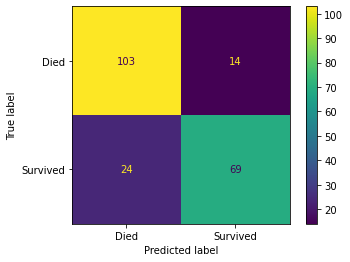

In [19]:
## Display confusion matrix
ConfusionMatrixDisplay(confusion, display_labels= ['Died', 'Survived']).plot()

In [20]:
## obtain model performance metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(Target_Test, Target_pred > 0.5, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Precision: 0.83
Recall: 0.74
F1 Score: 0.78


## Discussion

I have chosen a fully connected multilayer peceptron (MLP) neural network for prediction of titanic survivers. Evaluation of the precision, recall and overall F1 score indicate the model performs satisfactorily for the limited dataset. A precision of 0.83 potentially points to good performance with respect to true positives out of all survived (1) values predicted (i.e. less false positive predictions). A recall value of 0.74 is satisfactory, considering limited data, and points to a high accuracy with respect to predicting survived (1) correctly. The F1 score is a satisfactory value with a balance of precision and recall. I attempted to use class weights due to the slight class imbalance for the survived feature, the class weights should penalise incorrect survived (1) predictions in the loss function and inherently train the model to focus on the minor class (survived). If I increase the penalty, the model would become more biased towards predicting positive cases. This potentially worsens overall performance by reducing the accuracy of predictions (higher recall but lower precision due to more false positives)